# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2018

# Signals

## Sinusoidal signals

In [212]:
%matplotlib notebook
import numpy as num
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]
f = 10;
overSampRate = 15;
fs = overSampRate * f;
phase = 1/3*num.pi;
nCyl = 5;
t = num.arange(0,nCyl*(1/f)-(1/fs),1/fs);

<IPython.core.display.Javascript object>


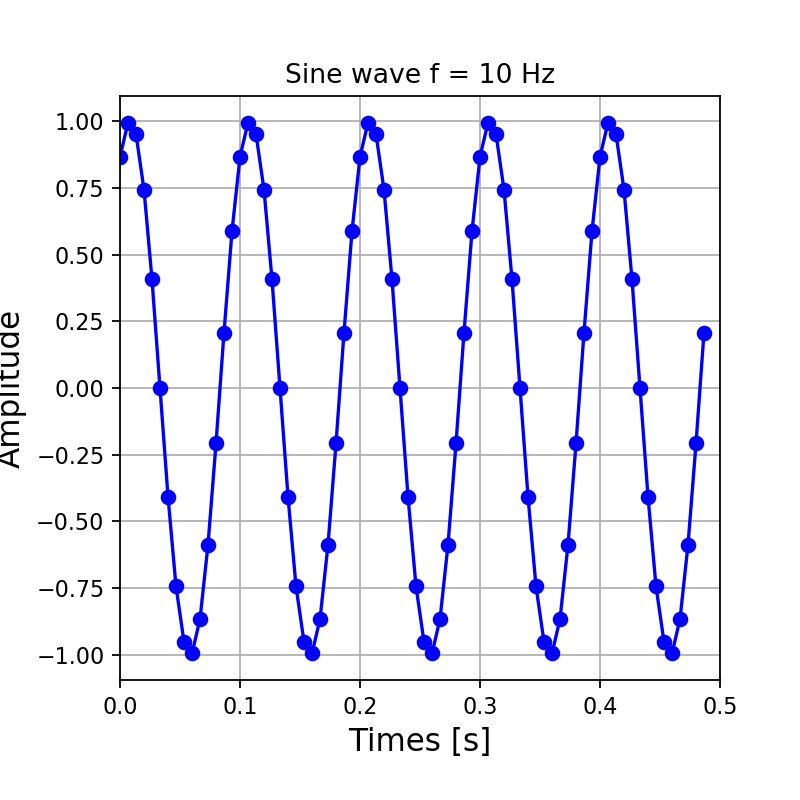

In [213]:
g = num.sin(2*num.pi*f*t+phase);
plt.figure();
plt.plot(t, g, 'bo-');
plt.xlim(0,0.5);
plt.title("Sine wave f = 10 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);

## Square wave
A true square wave can be simply generated by applying signum function over a periodic function
\begin{equation}
    g(t) = sgn\left[ \sin(2 \pi f t) \right]
\end{equation}
where
\begin{equation}
sgn(x) =
\begin{cases}
-1, \, \text { se } x < 0, \\
 0, \, \text { se } x < 0, \\
 1, \, \text { se } x < 0.
\end{cases}
\end{equation}

<IPython.core.display.Javascript object>


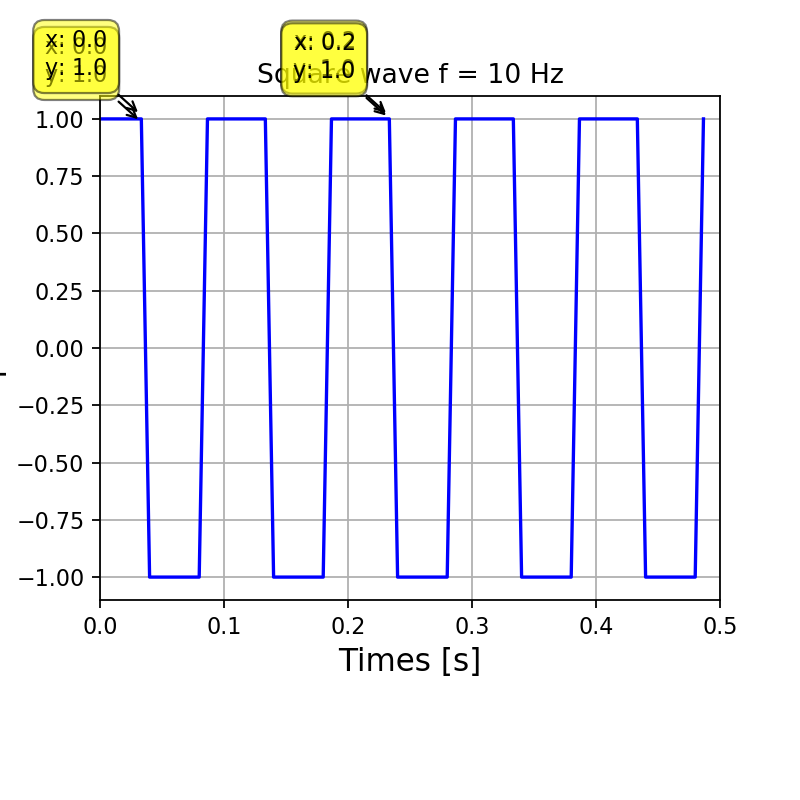

<IPython.core.display.Javascript object>


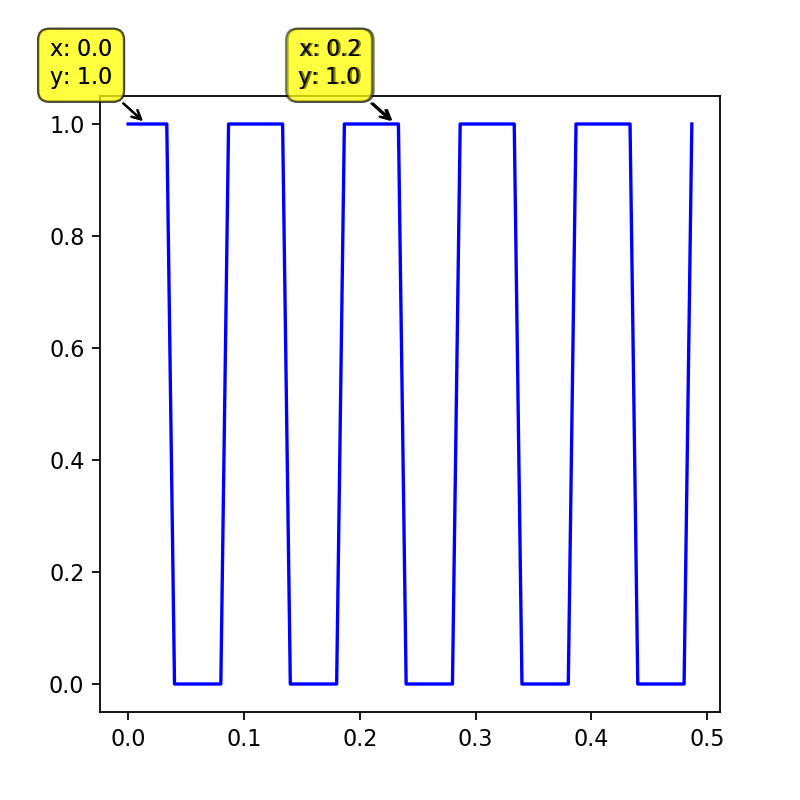

In [214]:
g = num.sign(num.sin(2*num.pi*f*t+phase));
plt.figure();
plt.plot(t, g, 'b-')
plt.xlim(0,0.5);
plt.title("Square wave f = 10 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);
plt.figure();
plt.plot(t, (g+1)/2, 'b-');

## Rectangular pulse
An isolated rectangular pulse of amplitude $A$ and duration $T$ is represented mathematically as
\begin{equation}
    g(t) = A \cdot rect\left(\frac{t}{T}\right)
\end{equation}
where
\begin{equation}
rect(x) =
\begin{cases}
1,  \, \text { se } |x| < 1/2, \\
1/2,\, \text { se } |x| = 1/2, \\
0,  \, \text { se } |x| > 1/2.
\end{cases}
\end{equation}

In [215]:
fs = 500;
T = 0.2;
t = num.arange(-0.5,0.5,1/fs);
g = (t > -T/2) * (t < T/2) + 0.5 * (t == T/2) + 0.5 * (t == -T/2)

<IPython.core.display.Javascript object>


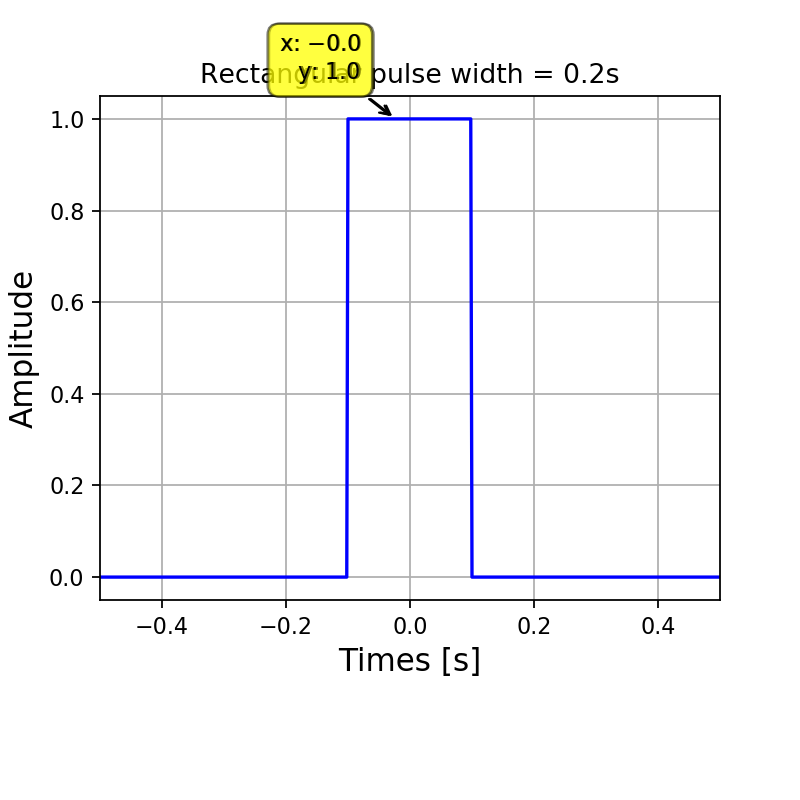

In [216]:
plt.figure();
plt.plot(t, g, 'b-')
plt.xlim(-0.5,0.5);
plt.title("Rectangular pulse width = 0.2s");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.grid(True);

## Gaussian pulse
The impulse response of a Gaussian Filter is written as a Gaussian function as follows
\begin{equation}
    g(t) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{r^2}{2\sigma^2}}.
\end{equation}

In [217]:
fs = 80;
sigma = 0.1;
t = num.arange(-0.5,0.5,1/fs);
g = 1/(num.sqrt(2*num.pi)*sigma)*num.exp(-(t**2)/(2*sigma**2));

<IPython.core.display.Javascript object>


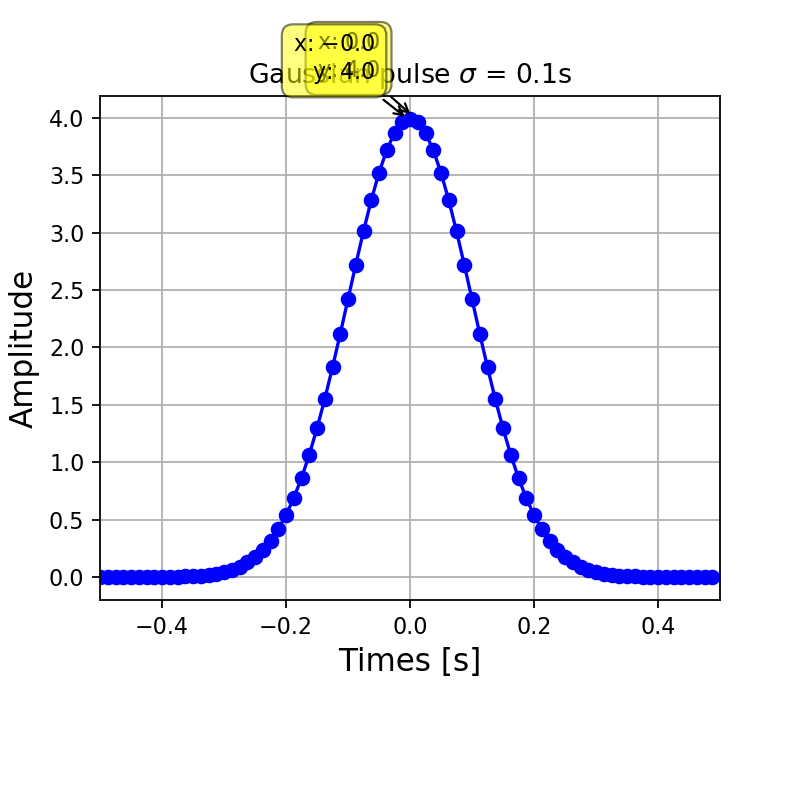

In [218]:
plt.figure();
plt.plot(t, g, 'bo-');
plt.xlim(-0.5,0.5);
plt.title("Gaussian pulse $\sigma$ = 0.1s");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

## Chirp signal
THe equation for generating a sinusidal (cosine here) signal with amplitude $A$, angular frequency $\omega_0$ and initial phase $\phi$ is
\begin{equation}
    x(t) = A \cos(2 \pi f(t) t + \phi_0),
\end{equation}
where, the time-varying frequency function is given by
\begin{equation}
    f(t) = \frac{k}{2}t + f_0,
\end{equation}
and
\begin{equation}
    k = \frac{f_1 - f_0}{T}.
\end{equation}

In [219]:
fs = 500; # Sampling frequency
t = num.arange(0,1,1/fs);
f0 = 1;  # 1 Hz at 0s.
f1 = 25; # 25 Hz at 1s.
t0 = 0;
T = 1 - t0; # period
k = (f1 - f0)/T;
g = num.cos(2*num.pi*(k/2*t+f0)*t + phase);

<IPython.core.display.Javascript object>


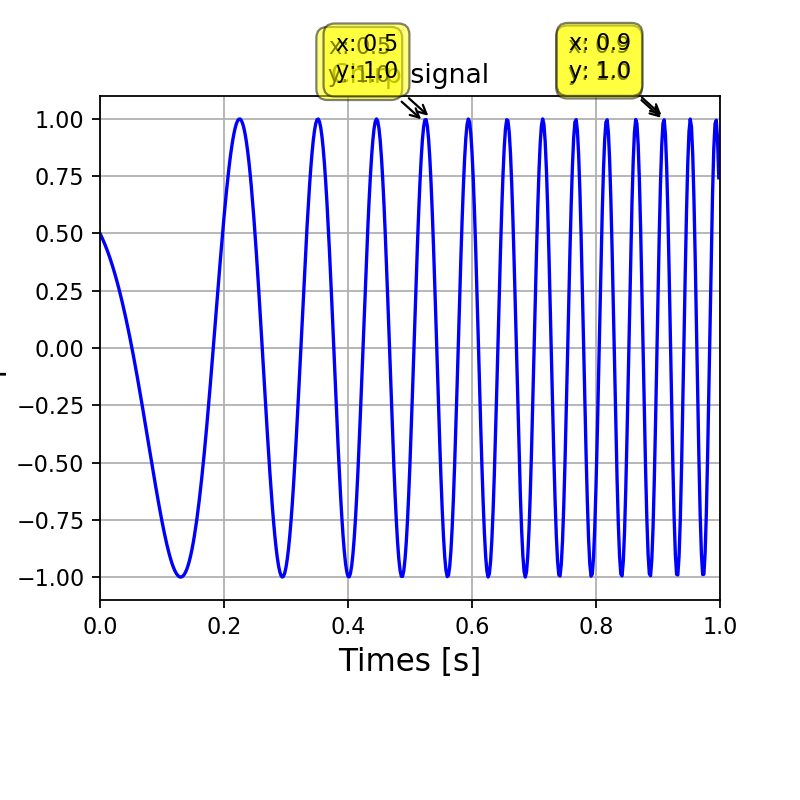

In [220]:
plt.figure();
plt.plot(t, g, 'b-');
plt.xlim(0,1);
plt.title("Chirp signal");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

## Fourier transform
### Problem:
Convert a time domain signal to frequency domain and viceversa.
### Solution:
Fourier Transform is an excellent tool to achieve this conversion and is ubiquitously used in many
applications.
### Characteristics:
In signal processing , a time domain signal can be continuous or discrete and it can be aperiodic or periodic.

| Transform | Nature of time domain signal | Nature of frequency spectrum |
|---------------------------|--------------------------|-------------------------|
| Fourier Transform (FT)    | continuous, non-periodic | non-periodic,continuous |
| Discrete-time Fourier Transform (DTFT) | discrete, non-periodic | periodic,continuous |
| Fourier Series (FS)   | continuous, periodic | non-periodic, discrete |
| Discrete Fourier Transform (DFT)    | discrete, periodic | periodic,discrete |

## Real DFT
The *real-valued* discrete Fourier transform of *real-valued* time domain waveform $x[n]$ is
\begin{align}
    X_{re}[k] &=  \frac{2}{N}\sum_{n = 0}^{N-1}x[n]\cos \left( 2 \pi k \frac{n}{N} \right), \\
    X_{im}[k] &= -\frac{2}{N}\sum_{n = 0}^{N-1}x[n]\sin \left( 2 \pi k \frac{n}{N} \right)
\end{align}
The time domain index $n$ runs from 0 to $N$, the frequency domain index $k$ runs from 0 to $N/2$. The
real-valued time domain signal $x[n]$ can be synthesized from the real DFT pairs as
\begin{equation}
    x[n] = \sum_{k = 0}^{N/2} \left[ X_{re}[k] \cos \left( 2 \pi k \frac{n}{N} \right) - X_{im}[k] \sin \left( 2 \pi k \frac{n}{N} \right) \right]
\end{equation}

<img src="DFT_real.png">

## Complex DFT
Consider the case of $N$-point complex DFT, it takes in $N$ samples of *complex-valued* time domain waveform $x[n]$ and produces an array $X[k]$ of length $N$:
\begin{equation}
    X[k] = \frac{1}{N}\sum_{n = 0}^{N-1}x[n] e^{-j 2 \pi k n/N}.
\end{equation}

<img src="DFT_complex.png">

The arrays values are interpreted as follows
* $X[0]$ represents DC frequency component;
* Next $N/2$ terms are positive frequency components with $X[N/2]$ being the Nyquist frequency;
* Next $N/2−1$ terms are negative frequency components;

<img src="DFT_complex_interp.png">

The corresponding synthesis equation (reconstruct $x[n]$ from frequency domain samples $X[k]$) is
\begin{equation}
    X[k] = \sum_{k = 0}^{N-1} X[k] e^{j 2 \pi k n/N}.
\end{equation}

## Fast Fourier Transform (FFT)
The FFT function is an algorithm published in 1965 by J.W.Cooley and J.W.Tuckey for efficiently calculating the DFT (James W. Cooley and John W. Tukey, An Algorithm for the Machine Calculation of Complex Fourier Series, Mathematics of Computation Vol. 19, No. 90, pp. 297-301, April 1965). FFT length is generally considered as power of 2 - this is called radix − 2 FFT which exploits the twiddle factors.

Lets assume that the $x[n]$ is the time domain cosine signal of frequency $fc$ = 10 Hz that is sampled at a frequency
$fs = 32 ∗ fc$ for representing it in the computer memory.

<IPython.core.display.Javascript object>


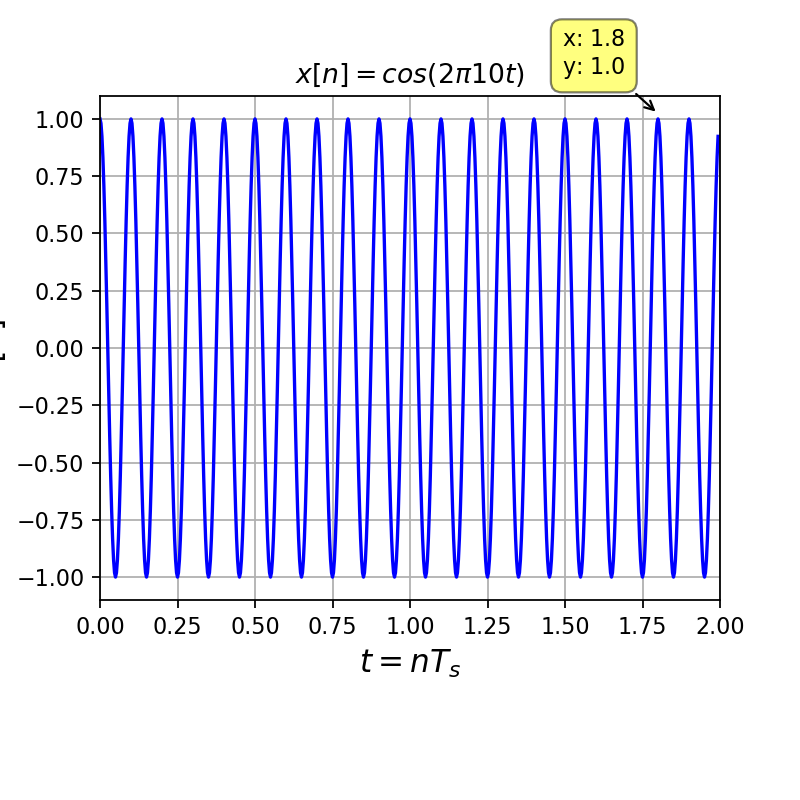

In [221]:
fc = 10; #frequency of the carrier
fs = 32 * fc; #sampling frequency with oversampling factor=32
t  = num.arange(0, 2-1/fs, 1/fs); # 2 seconds duration
x  = num.cos(2*num.pi*fc*t);     # time domain signal (real number)

plt.figure();
plt.plot(t, x, 'b-');
plt.xlim(0,2);
plt.title("$x[n]=cos(2 \pi 10 t)$");
plt.xlabel("$t = nT_s$", fontsize = 14);
plt.ylabel("x[n]", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

In [222]:
N = 256; #FFT size
X = num.fft.fft(x, N); # %N-point complex DFT, output contains DC at index 1 Nyquist frequency at N/2+1 th 
# index positive frequencies from index 2 to N/2 negative frequencies from index N/2+1 to N.
X[0]

(-1.3858304524969697e-14+0j)

Note that the index for the raw FFT are integers from $1 \rightarrow N$. We need to process it to convert these integers to frequencies. That is where the sampling frequency counts. Each point/bin in the FFT output array is spaced by the frequency resolution $\Delta f$, that is calculated as
\begin{equation}
    \Delta f = \frac{f_s}{N}.
\end{equation}

For our example, each point in the array is spaced by the frequency resolution
\begin{equation}
    \Delta f = \frac{f_s}{N} = \frac{32 f_c}{256} = \frac{320}{256} = 1.25 \text{ Hz}.
\end{equation}
The 10Hz cosine signal will register a spike at the 8th sample (10/1.25=8):

In [223]:
num.abs(X[7:10]) #display samples 7 to 9

array([2.38410772e-14, 1.28000000e+02, 2.92049826e-14])

In [224]:
1.25*num.arange(7,10)

array([ 8.75, 10.  , 11.25])

In [225]:
# calculate frequency bins with FFT
df = fs/N;                       # frequency resolution
sampleIndex = num.arange(0,N); # raw index for FFT plot
f  = sampleIndex * df;           # x-axis index converted to frequencies

Now, plot the absolute value of the FFT against frequencies:

<IPython.core.display.Javascript object>


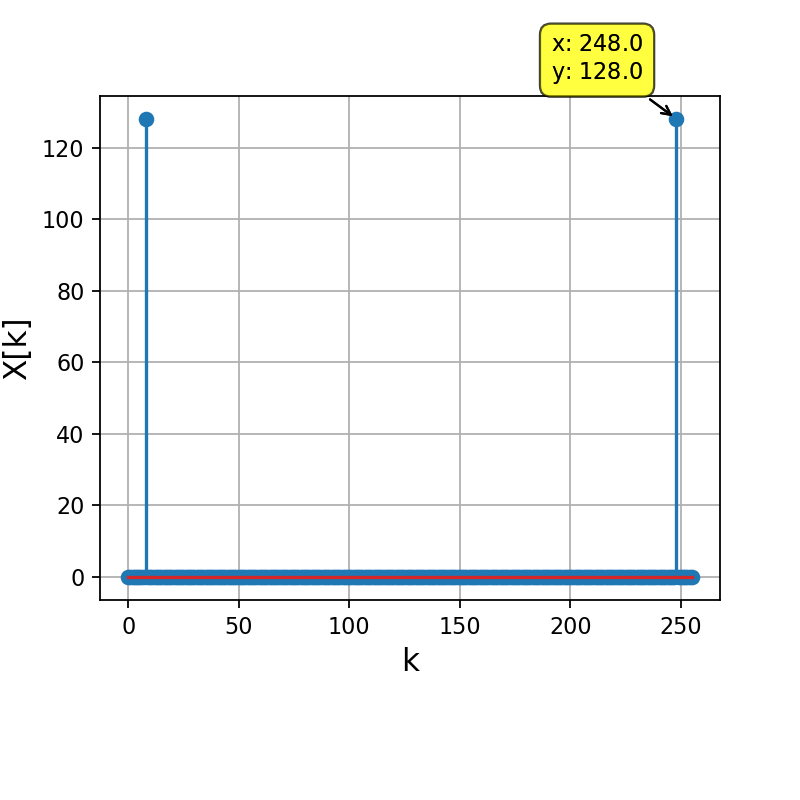

In [226]:
from mpldatacursor import datacursor
plt.figure();
plt.stem(sampleIndex, num.abs(X));
plt.xlabel("k",    fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.grid(True);
plt.gcf().subplots_adjust(bottom=0.25)
datacursor()
plt.show()

<IPython.core.display.Javascript object>


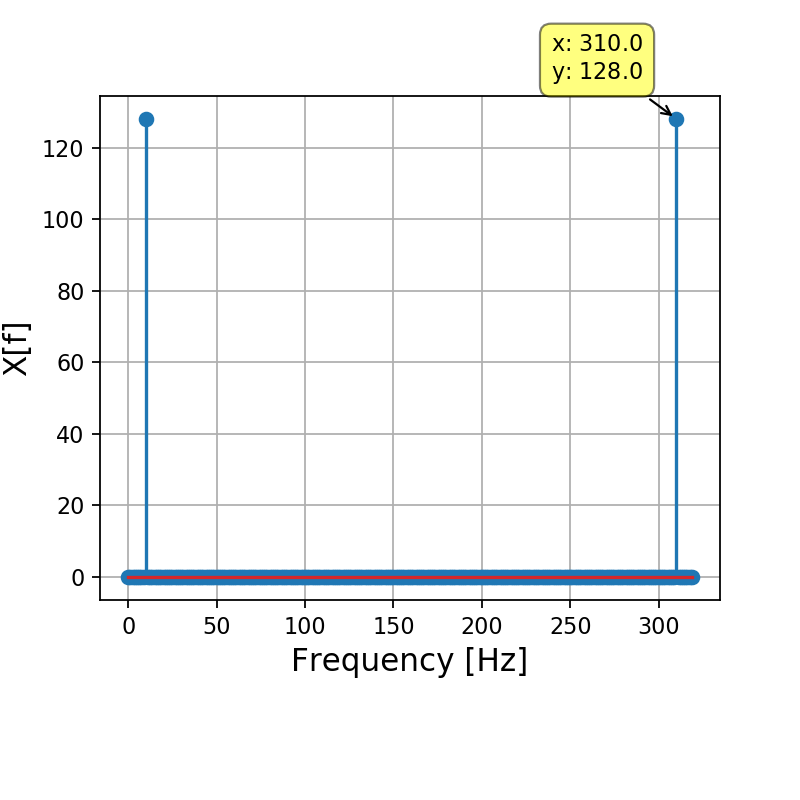

In [227]:
plt.figure();
plt.stem(f, num.abs(X));
plt.xlabel("Frequency [Hz]", fontsize = 14);
plt.ylabel("X[f]",           fontsize = 14);
plt.grid(True);
plt.gcf().subplots_adjust(bottom=0.25);
datacursor();
plt.show();

## FFTShift
Proper order in the x-axis: negative frequencies $\rightarrow$ DC $\rightarrow$ positive frequencies.

* $X[1]$ represents DC frequency component;
* $X[2]$ to $X[N/2]$ terms are positive frequency components;
* $X[N/2 + 1]$ is the Nyquist frequency ($F_s=2$) that is common to both positive and negative frequencies;
* $X[N/2 + 1]$ to $X[N]$ terms are considered as negative frequency components.

<img src="fft_shift.png">

<IPython.core.display.Javascript object>


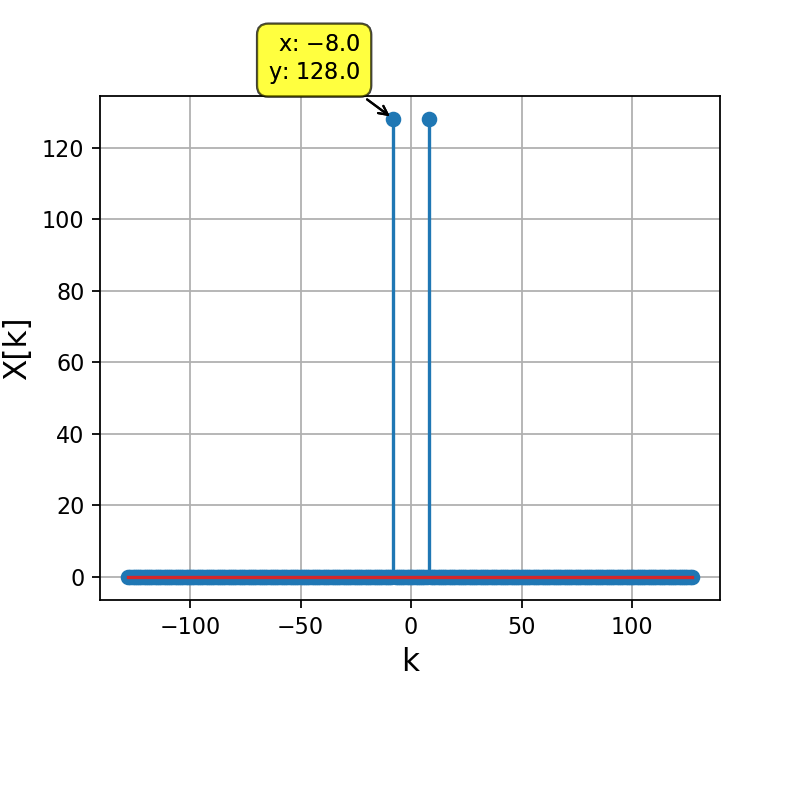

In [228]:
X_shift = num.fft.fftshift(X);
sampleIndex = num.arange(-N/2,N/2);
f = sampleIndex*df;
num.size(sampleIndex)

plt.figure();
plt.stem(sampleIndex, num.abs(X_shift));
plt.xlabel("k",    fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.grid(True);
plt.gcf().subplots_adjust(bottom=0.25);
datacursor()
plt.show()

<IPython.core.display.Javascript object>


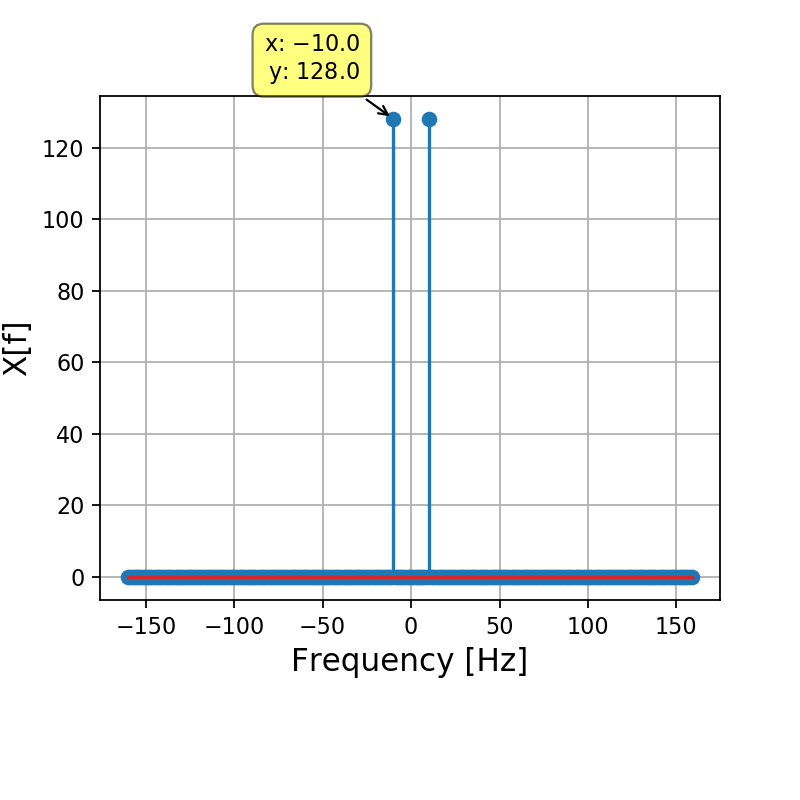

In [229]:
plt.figure();
plt.stem(f, num.abs(X_shift));
plt.xlabel("Frequency [Hz]", fontsize = 14);
plt.ylabel("X[f]",           fontsize = 14);
plt.grid(True);
plt.gcf().subplots_adjust(bottom=0.25);
datacursor();
plt.show();

## IFFTShift
One can undo the effect of fftshift by employing ifftshift function. The ifftshift function restores the raw frequency order. If the FFT output is ordered using fftshift function, then one must restore the frequency components back to original order before taking IFFT. Following statements are equivalent.


In [168]:
X = num.fft.fft(x,N);  # compute X[k]
x = num.fft.ifft(X,N); # compute x[n]

In [169]:
X = num.fft.fftshift(num.fft.fft(x,N));  # take FFT and rearrange frequency order
x = num.fft.ifft(num.fft.ifftshift(X),N) # restore raw freq order and then take IFFT

## Obtaining magnitude and phase information from FFT
Lets take an arbitrary cosine function of the form 
\begin{equation}
    x(t) = A \cos(2 \pi f_c t + \phi)
\end{equation}
and proceed step by step as follows:
* represent the signal $x(t)$ in computer (discrete-time) and plot the signal (time domain);
* represent the signal in frequency domain using FFT ($X[k]$);
* extract amplitude and phase information from the FFT result;
* reconstruct the time domain signal from the frequency domain samples.

### Discrete-time domain representation
Consider a cosine signal of amplitude $A = 0.5$, frequency $f_c = 10~$Hz and phase $\phi = \pi/6~$rad (or 30◦):
\begin{equation}
    x(t) = 0.5 \cos\left( 2 \pi 10 t + \pi/6 \right).
\end{equation}
Let's represent the signal $x(t)$ in computer (discrete-time) and plot the signal (time domain):

<IPython.core.display.Javascript object>


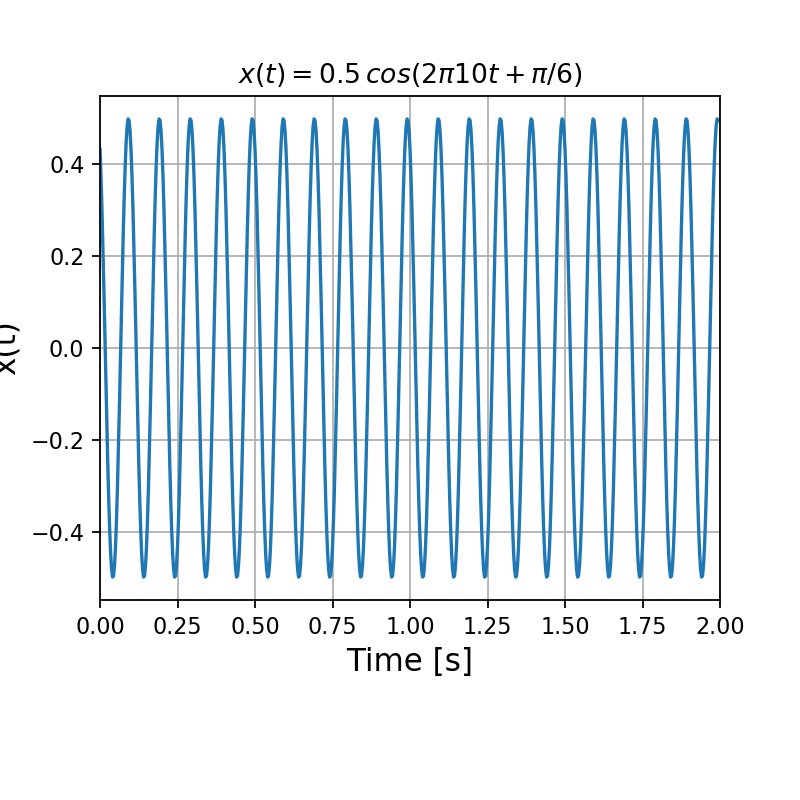

In [230]:
A  = 0.5;        # amplitude of the cosine wave
fc = 10;         # frequency of the cosine wave
phase = 30;      # desired phase shift of the cosine in degrees
fs    = 32 * fc; # sampling frequency with oversampling factor 32
t     = num.arange(0, 2-1/fs, 1/fs); # 2 seconds duration
phi   = phase * num.pi/180;     # convert phase shift in degrees in radians
x = A * num.cos(2 * num.pi * fc * t + phi); # time domain signal with phase shift
plt.figure();
plt.plot(t, x);
plt.xlim(0,2);
plt.title("$x(t)=0.5\,cos(2 \pi 10 t + \pi/6)$");
plt.xlabel("Time [s]", fontsize = 14);
plt.ylabel("x(t)",     fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.grid(True);

### Representing the signal in frequency domain using FFT
* The FFT function computes N-point complex DFT;
* The length of the transformation N should cover the signal of interest otherwise we will some loose valuable information in the conversion process to frequency domain;
* However, we can choose a reasonable length if we know about the nature of the signal;

*For example, the cosine signal of our interest is periodic in nature and is of length 640 samples (for 2 seconds duration signal). We can simply use a lower number N = 256 for computing the FFT. In this case, only the first 256 time domain samples will be considered for taking FFT. However, we do not need to worry about loss of any valuable information, as the 256 samples will have sufficient number of cycles to extract the frequency of the signal. we need at least 20 samples!*

In [231]:
N=256; # FFT size
X = 1/N*num.fft.fftshift(num.fft.fft(x,N)); # N-point complex DFT

### Extract amplitude of frequency components (amplitude spectrum)
The FFT function computes the complex DFT and the hence the results in a sequence of complex numbers of
form Xre + jXim. The amplitude spectrum is obtained:
\begin{equation}
    |X[k]| = \sqrt{X_{re}^2 + X_{im}^2}.
\end{equation}

<IPython.core.display.Javascript object>


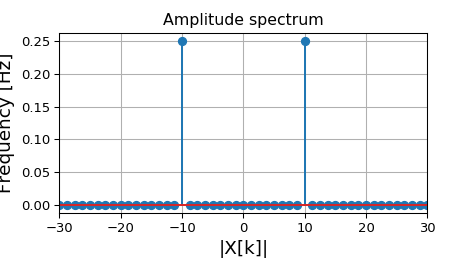

In [172]:
df = fs/N;                           # frequency resolution
sampleIndex = num.arange(-N/2, N/2); # ordered index for FFT plot
f  = sampleIndex * df;               # x-axis index converted to ordered frequencies
plt.figure();
plt.stem(f, abs(X));                 # magnitudes vs frequencies
plt.xlim(-30,30);
plt.title("Amplitude spectrum");
plt.xlabel("|X[k]|",         fontsize = 14);
plt.ylabel("Frequency [Hz]", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.grid(True);

### Extract phase of frequency components (phase spectrum)
Extracting the correct phase spectrum is a tricky business. I will show you why it is so. The phase of the spectral
components are computed as
\begin{equation}
    \angle X[k] = \tan^{-1}\left( \frac{X_{im}}{X_{re}} \right)
\end{equation}

<IPython.core.display.Javascript object>


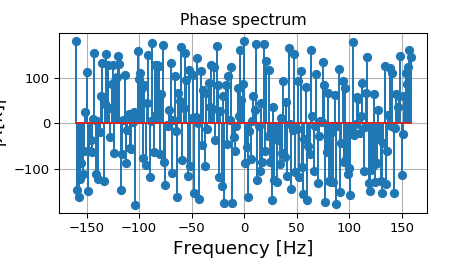

In [173]:
phase = num.arctan2(num.imag(X), num.real(X)) * 180 / num.pi; #phase information
plt.figure();
plt.stem(f, phase);                 # magnitudes vs frequencies
plt.title("Phase spectrum");
plt.ylabel("$|X[k]|$", fontsize = 14);
plt.xlabel("Frequency [Hz]",  fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

In [174]:
X[0:5]

array([-7.28583860e-17+0.00000000e+00j, -3.61064284e-17-2.51327003e-17j,
       -4.83433671e-17-1.61867144e-17j, -3.61370609e-17-5.62229476e-17j,
        3.02526316e-18-4.96292360e-17j])

In [175]:
num.arctan2(num.imag(X[0:5]), num.real(X[0:5]))*180/num.pi

array([ 180.        , -145.15927587, -161.48800992, -122.73071021,
        -86.5117215 ])

Define a tolerance threshold and ignore all the computed phase values that are below the threshold.

<IPython.core.display.Javascript object>


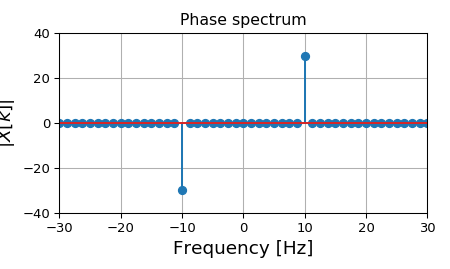

In [176]:
X2 = X; # store the FFT results in another array
# detect noise (very small numbers (eps)) and ignore them
threshold = num.max(num.abs(X)) / 10000; # tolerance threshold
X2[num.where(num.abs(X) < threshold)] = 0; # maskout values that are below the threshold
phase2 = num.arctan2(num.imag(X2), num.real(X2)) * 180 / num.pi; #phase information
plt.figure();
plt.stem(f, phase2);                 # magnitudes vs frequencies
plt.title("Phase spectrum");
plt.ylabel("$|X[k]|$", fontsize = 14);
plt.xlabel("Frequency [Hz]",  fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.ylim(-40, 40);
plt.xlim(-30, 30);
plt.grid(True);

### Reconstructing the time domain signal from the frequency domain samples


<IPython.core.display.Javascript object>


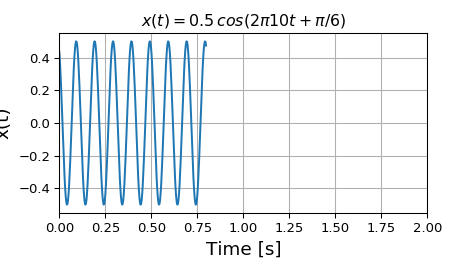

C:\Users\Adolfo\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [177]:
x_recon = N * num.fft.ifft(num.fft.ifftshift(X), N); #reconstructed signal
t = num.arange(0,num.size(x_recon), 1)/fs; #recompute time index
plt.figure();
plt.plot(t, x_recon);                 # magnitudes vs frequencies
plt.xlim(0,2);
plt.title("$x(t)=0.5\,cos(2 \pi 10 t + \pi/6)$");
plt.xlabel("Time [s]", fontsize = 14);
plt.ylabel("x(t)",     fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.grid(True);